# Imports

In [1]:
#base imports
import pandas as pd
import numpy as np
#visualizations
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# modeling imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Loading csv file

In [3]:
housing_df= pd.read_csv('Data/kc_house_data.csv')
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


# Finding and Removing Null Values

In [4]:
housing_df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [5]:
housing_df.dropna(inplace = True)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

# Creating new column with zipcodes

In [6]:
housing_df['address'].value_counts()

Avenue, 108 Foothill Blvd, Rancho Cucamonga, California 91730, United States    38
Delridge Way Southwest, Seattle, Washington 98106, United States                24
9th Ave, Nebraska City, Nebraska 68410, United States                           21
South 35th Avenue, Bellevue, Nebraska 68123, United States                      20
A, Leadwood, Missouri 63653, United States                                      17
                                                                                ..
13240 22nd Avenue South, SeaTac, Washington 98168, United States                 1
13027 Southeast 184th Place, Renton, Washington 98058, United States             1
3810 145th Avenue Southeast, Bellevue, Washington 98006, United States           1
7552 31st Avenue Northeast, Seattle, Washington 98115, United States             1
2409 Northwest 75th Street, Seattle, Washington 98117, United States             1
Name: address, Length: 29519, dtype: int64

In [7]:
housing_df['zipcode'] = housing_df['address'].str.findall(r'([0-9]\d+)').apply(
    lambda x: x[-1] if len(x) >= 1 else '')
housing_df['zipcode'] = housing_df['zipcode'].astype(int)

In [8]:
housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


# Creating numerical column based on condition values

In [9]:
housing_df['condition'].value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [10]:
housing_df["condition"] = housing_df["condition"].astype('category')
housing_df["condition"] = housing_df["condition"].cat.reorder_categories(
    ["Poor","Fair","Average","Good","Very Good"])

In [11]:
housing_df["condition_code"] = housing_df["condition"].cat.codes
housing_df["condition_code"].value_counts()

2    18515
3     8052
4     3258
1      225
0       61
Name: condition_code, dtype: int64

# Creating numerical column with view values

In [12]:
housing_df["view_code"] = housing_df["view"].astype('category')
categories2 = ["NONE","FAIR","AVERAGE","GOOD","EXCELLENT"]
housing_df["view_code"] = housing_df["view_code"].cat.reorder_categories(categories2)
housing_df["view_code"] = housing_df["view_code"].cat.codes
housing_df["view_code"].value_counts()

0    26555
2     1910
3      877
4      549
1      220
Name: view_code, dtype: int64

# Splitting string and numerical value form the grades column. Creating a new column with grades numerical value

In [13]:
housing_df["grade"].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [14]:
import string
housing_df["grade_str"] = housing_df["grade"].str.strip(string.digits)
housing_df["grade_str"] = housing_df["grade_str"].str.strip()

In [15]:
housing_df["grade_code"] = housing_df["grade_str"].astype('category')
categories = ['Substandard','Poor','Low','Fair','Low Average','Average','Good','Better',
             'Very Good','Excellent','Luxury','Mansion']
housing_df["grade_code"] = housing_df["grade_code"].cat.reorder_categories(categories)
housing_df["grade_code"] = housing_df["grade_code"].cat.codes
housing_df["grade_code"].value_counts()

5     11693
6      9400
7      3804
4      2852
8      1369
9       406
3       385
10      122
2        46
11       24
1         9
0         1
Name: grade_code, dtype: int64

In [16]:
#dropping columns that we are not using
housing_df = housing_df.drop(columns =['id', 'yr_renovated','address', 'long','lat','grade_str'], axis = 1 )

# Removing zip codes not in Kings County

In [17]:
# Creating a dictionary with zipcodes within kings county and corresponding city name
zip_dict = dict({
98002 : "Auburn",
98092: "Auburn",
98224: "Baring",
98004: "Bellevue",
98005: "Bellevue",
98006: "Bellevue",
98007: "Bellevue",
98008: "Bellevue",
98010: "Black Diamond",
98011: "Bothell",
98178: "Bryn Mawr-Skyway",
98148: "Burien",
98166: "Burien",
98014: "Carnation",
98077: "Cottage Lake",
98042: "Covington",
98198: "Des Moines",
98019: "Duvall",
98031: "East Hill-Meridian",
98022: "Enumclaw",
98058: "Fairwood",
98024: "Fall City",
98003: "Federal Way",
98023: "Federal Way",
98027: "Issaquah",
98029: "Issaquah",
98028: "Kenmore",
98032: "Kent",
98030: "Kent",
98033: "Kirkland",
98034: "Kirkland",
98001: "Lakeland North",
98038: "Maple Valley",
98039: "Medina",
98040: "Mercer Island",
98045: "North Bend",
98047: "Pacific",
98050: "Preston",
98051: "Ravensdale",
98052: "Redmond",
98055: "Renton",
98056: "Renton",
98057: "Renton",
98059: "Renton",
98074: "Sammamish",
98075: "Sammamish",
98188: "SeaTac",
98199: "Seattle",
98174: "Seattle",
98154: "Seattle",
98158: "Seattle",
98164: "Seattle",
98101: "Seattle",
98102: "Seattle",
98103: "Seattle",
98104: "Seattle",
98105: "Seattle",
98106: "Seattle",
98107: "Seattle",
98108: "Seattle",
98109: "Seattle",
98112: "Seattle",
98115: "Seattle",
98116: "Seattle",
98117: "Seattle",
98118: "Seattle",
98119: "Seattle",
98121: "Seattle",
98122: "Seattle",
98125: "Seattle",
98126: "Seattle",
98133: "Seattle",
98134: "Seattle",
98136: "Seattle",
98144: "Seattle",
98155: "Shoreline",
98177: "Shoreline",
98288: "Skykomish",
98065: "Snoqualmie",
98168: "Tukwila",
98053: "Union Hill-Novelty Hill",
98195: "Univ Of Washington",
98070: "Vashon",
98146: "White Center",
98072: "Woodinville"})

In [18]:
zip_list = list(zip_dict.keys())

In [19]:
#creating a new dataframe with zipcodes from kings county
housing_df2 = housing_df[housing_df["zipcode"].isin(zip_list)]
housing_df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,zipcode,condition_code,view_code,grade_code
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,98055,3,0,5
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,98133,2,2,5
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,98178,2,2,5
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,98118,2,2,7
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,98027,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,PUBLIC,1600,1130,0,210,1921,98103,3,0,6
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,PUBLIC,2020,0,0,520,2011,98116,2,1,5
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,PUBLIC,940,920,240,110,1995,98122,2,0,5
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,PUBLIC,1830,740,480,100,2006,98055,2,0,6


# Seeing correlations between the variables

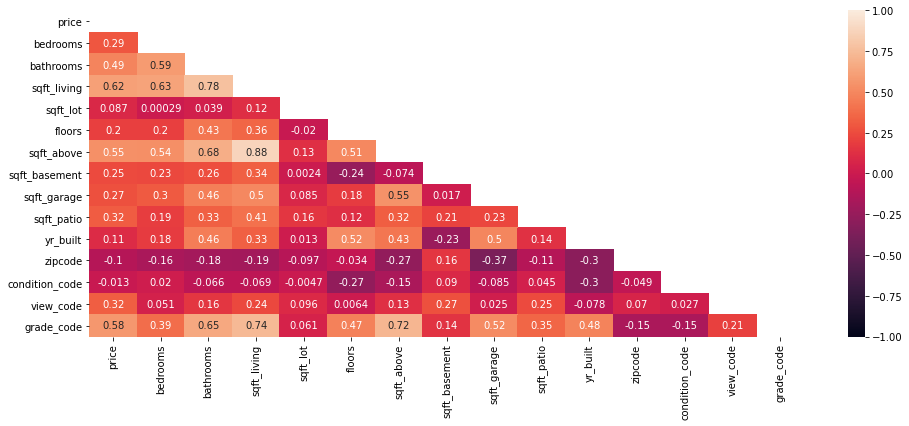

In [20]:
#Creating a heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(housing_df2.corr(), dtype=np.bool))
heatmap = sns.heatmap(housing_df2.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

# Simple Linear Regression - Price & Grade

In [51]:
import statsmodels.api as sm

X = housing_df2[['grade_code']]
y = np.log(housing_df2['price'])

simple_model = sm.OLS(endog = y, exog = sm.add_constant(X))

simple_model_results = simple_model.fit()
print(simple_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                 1.831e+04
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        14:12:35   Log-Likelihood:                -18647.
No. Observations:               29149   AIC:                         3.730e+04
Df Residuals:                   29147   BIC:                         3.731e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9596      0.013    891.255      0.0

In [52]:
# Test Train Split model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [53]:
#Scaling
scaler = StandardScaler()

scaler.fit(X_train)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
# Creating linear regression model

In [58]:
grade_lr = LinearRegression()
grade_lr.fit(X_train_transformed, y_train)
print('train:{}'.format(grade_lr.score(X_train_transformed, y_train)))
print('test:{}'.format(grade_lr.score(X_test_transformed, y_test)))

train:0.3811969987274234
test:0.4050156742180778


In [59]:
y_pred = grade_lr.predict(X_test)

grade_mean = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error = $', grade_mean)
grade_r2 = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Square Error = $', grade_r2)

Mean Absolute Error = $ 2.0452362508672146
Root Mean Square Error = $ 2.093580000658894


In [64]:
r_squared = grade_lr.score(X_train_transformed, y_train)
r_squared

0.3811969987274234

In [65]:
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train_transformed.shape[1]-1))
adj_r2

0.3811757683091549

In [68]:
grade_lr.score(X_test_transformed, y_test)

0.4050156742180778

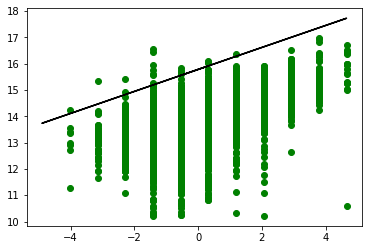

In [66]:
plt.scatter(X_train_transformed, y_train, color = 'g')
plt.plot(X_test_transformed, y_pred, color = 'k')

plt.show()

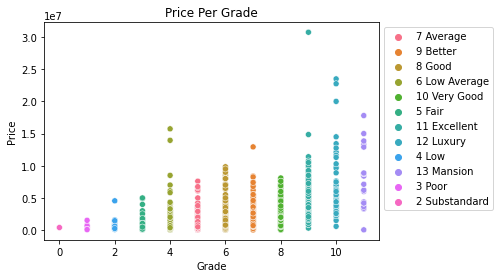

In [69]:
fig, ax = plt.subplots()

sns.scatterplot(x = "grade_code", y = "price",hue = "grade", data = housing_df)
ax.set_title("Price Per Grade")
ax.set_ylabel("Price")
ax.set_xlabel("Grade")

plt.legend(loc='upper left', bbox_to_anchor = (1,1))

plt.show()

# Simple Linear Regression: Price - Condition

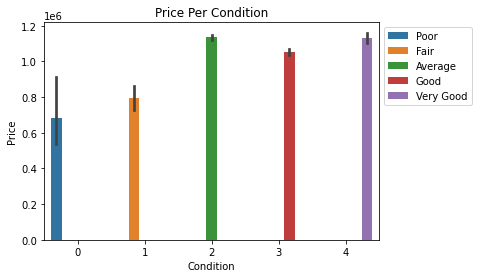

In [71]:
#viewing boxplot of price and condition
fig, ax = plt.subplots()

sns.barplot(x = "condition_code", y = "price",hue = "condition", data = housing_df)
ax.set_title("Price Per Condition")
ax.set_ylabel("Price")
ax.set_xlabel("Condition")

plt.legend(loc='upper left', bbox_to_anchor = (1,1))

plt.show()

In [72]:
X_cond = housing_df2[['condition_code']]
y_cond = np.log(housing_df2['price'])

# Replace None with appropriate code
condition_model = sm.OLS(endog = y_cond, exog = sm.add_constant(X_cond))

condition_model_results = condition_model.fit()
print(condition_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.072
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.300
Time:                        14:19:45   Log-Likelihood:                -25752.
No. Observations:               29149   AIC:                         5.151e+04
Df Residuals:                   29147   BIC:                         5.152e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.7262      0.013   1095.

In [73]:
X_cond_train, X_cond_test, y_cond_train, y_cond_test = train_test_split(X_cond, y_cond, test_size = 0.20, random_state = 42)

In [74]:
cond_lr = LinearRegression()
cond_lr.fit(X_cond_train, y_cond_train)

LinearRegression()

In [75]:
y_cond_pred = cond_lr.predict(X_cond_test)

cond_mean = mean_absolute_error(y_cond_test,y_cond_pred)
print('Mean Absolute Error = $', cond_mean)
cond_r2 = mean_squared_error(y_cond_test, y_cond_pred, squared = False)
print('Root Mean Square Error = $', grade_r2)

Mean Absolute Error = $ 0.4408172407902587
Root Mean Square Error = $ 2.093580000658894


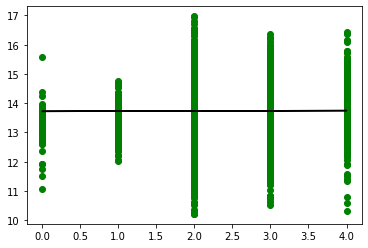

In [76]:
plt.scatter(X_cond_train, y_cond_train, color = 'g')
plt.plot(X_cond_test, y_cond_pred, color = 'k')

plt.show()